Assignment 1: 

Name: Nisargkumar Upadhyay 

UID: 118221625

Please submit to Gradescope
- a PDF containing all outputs (by executing **Run all**)
- your ipynb notebook containing all the code

I understand the policy on academic integraty (collaboration and the use of online material).
Please sign your name here: 


# Part A: Hybrid Image (25 Points)

## Overview

A hybrid image is the sum of a *low-pass filtered* version of the one image and a *high-pass filtered* version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the “cutoff-frequency”. In the paper it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well. In the starter code, the cutoff frequency is controlled by changing the standard deviation of the Gausian filter used in constructing the hybrid images. [This](https://drive.google.com/uc?id=187FjBJLwnYXhylx08Vdh1SAA3AO-imYv) is the sample example.

NOTE: 

1. Reading [this](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) will help in understanding Part A.

2. You can use any image processing libraries of your choice such as skimage or cv2; in python.

We provided 7 pairs of aligned images. The alignment is important because it affects the perceptual grouping (read the paper for details). We encourage you to create additional examples (e.g. change of expression, morph between different objects, change over time, etc.).

You are required to provide **THREE hybrid image results** and for ONE of your favorite result, please provide answers to the following **FOUR sub-parts** mentioned in the write-up.

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [212]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanC
To: /content/hybrid_pyramid_input.zip
100% 2.19M/2.19M [00:00<00:00, 179MB/s]
Archive:  /content/hybrid_pyramid_input.zip
replace /content/data/Afghan_girl_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/Afghan_girl_before.jpg  
replace /content/data/motorcycle.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/motorcycle.bmp  
replace /content/data/cat.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/cat.bmp   
replace /content/data/makeup_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/makeup_before.jpg  
replace /content/data/fish.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/fish.bmp  
replace /content/data/bicycle.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/bicycle.bmp  
replace /content/data/makeup_after.jpg? [y]es, [n]o, [A]ll, [N]one, [

## Code

In [213]:
# Helper Functions

def vis_hybrid_image(hybrid_image):
  scales = 5
  scale_factor = 0.5
  padding = 5
  original_height = hybrid_image.shape[0]
  num_colors = hybrid_image.shape[2] # counting how many color channels the input has
  output = hybrid_image
  cur_image = hybrid_image

  for i in range(2, scales):
      # add padding
      output = np.concatenate((output, np.ones((original_height, padding, num_colors), dtype=int)), axis=1)      
      # dowsample image;
      width = int(cur_image.shape[1] * scale_factor)
      height = int(cur_image.shape[0] * scale_factor)
      dim = (width, height)
      cur_image = cv2.resize(cur_image, dim, interpolation = cv2.INTER_LINEAR)
      # pad the top and append to the output
      tmp = np.concatenate((np.ones((original_height-cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image), axis=0)
      output = np.concatenate((output, tmp), axis=1)
  
  output = (output * 255).astype(np.uint8)
  return output






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log


(550, 400)


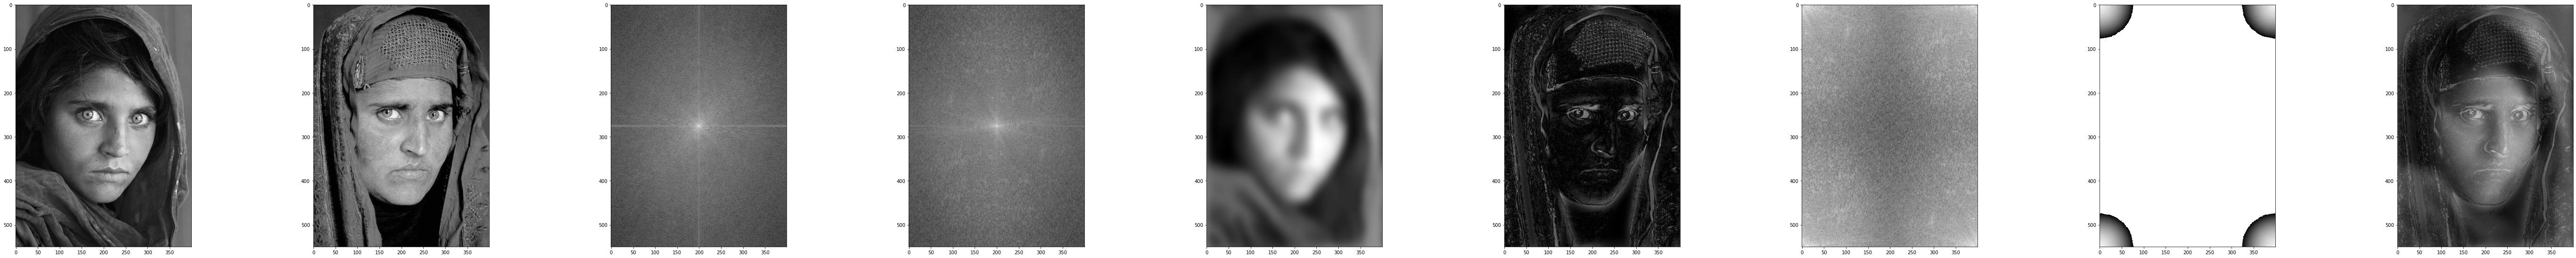

In [214]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/data/Afghan_girl_before.jpg', 0)
img1 =  cv2.imread('/content/data/Afghan_girl_after.jpg', 0)

def gaussian_2D_filter(shape,cutoff_frequency):
  M = shape[0]
  N = shape[1]
  H = np.zeros((M, N, 2), np.float32)
  D0 = cutoff_frequency
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = np.exp(-D**2/(2*D0*D0))
  return H


# YOUR CODE HERE: TUNE cutoff_frequency
cutoff_frequency = 7
x = np.shape(img)


"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""
filter = gaussian_2D_filter(x, cutoff_frequency)

"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
fshift = dft_shift * filter
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
HPC = 1-filter
dft1 = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
fshift1 = dft_shift1 * HPC
f_ishift1 = np.fft.ifftshift(fshift1)

img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:, :, 0], img_back1[:, :, 1])

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid = img_back+img_back1


"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))
f_septrum1 = 20 * np.log(cv2.magnitude(f_ishift1[:, :, 0], f_ishift1[:, :, 1]))

"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""

# YOUR CODE HERE.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
f_septrum = 20 * np.log(cv2.magnitude(f_ishift[:, :, 0], f_ishift[:, :, 1]))

"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
plots = [img,img1,magnitude_spectrum,magnitude_spectrum1,img_back,img_back1,f_septrum1,f_septrum,hybrid]
print(np.shape(hybrid))
plt.figure(figsize=(100,100))
for i in range(9):
    plt.subplot(9,9,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(plots[i],cmap = "gray")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log


(361, 410)


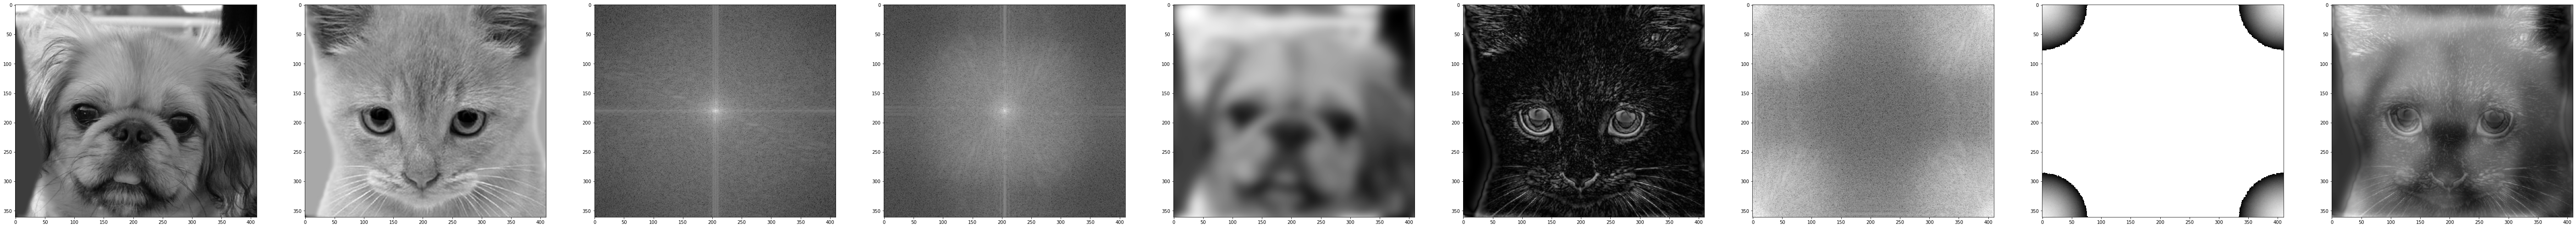

In [215]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/data/dog.bmp', 0)
img1 =  cv2.imread('/content/data/cat.bmp', 0)

def gaussian_2D_filter(shape,cutoff_frequency):
  M = shape[0]
  N = shape[1]
  H = np.zeros((M, N, 2), np.float32)
  D0 = cutoff_frequency
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = np.exp(-D**2/(2*D0*D0))
  return H


# YOUR CODE HERE: TUNE cutoff_frequency
cutoff_frequency = 7
x = np.shape(img)


"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""
filter = gaussian_2D_filter(x, cutoff_frequency)

"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
fshift = dft_shift * filter
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
HPC = 1-filter
dft1 = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
fshift1 = dft_shift1 * HPC
f_ishift1 = np.fft.ifftshift(fshift1)

img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:, :, 0], img_back1[:, :, 1])

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid = img_back+img_back1


"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))
f_septrum1 = 20 * np.log(cv2.magnitude(f_ishift1[:, :, 0], f_ishift1[:, :, 1]))

"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""

# YOUR CODE HERE.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
f_septrum = 20 * np.log(cv2.magnitude(f_ishift[:, :, 0], f_ishift[:, :, 1]))

"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
plots = [img,img1,magnitude_spectrum,magnitude_spectrum1,img_back,img_back1,f_septrum1,f_septrum,hybrid]
print(np.shape(hybrid))
plt.figure(figsize=(100,100))
for i in range(9):
    plt.subplot(9,9,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(plots[i],cmap = "gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log


(275, 183)


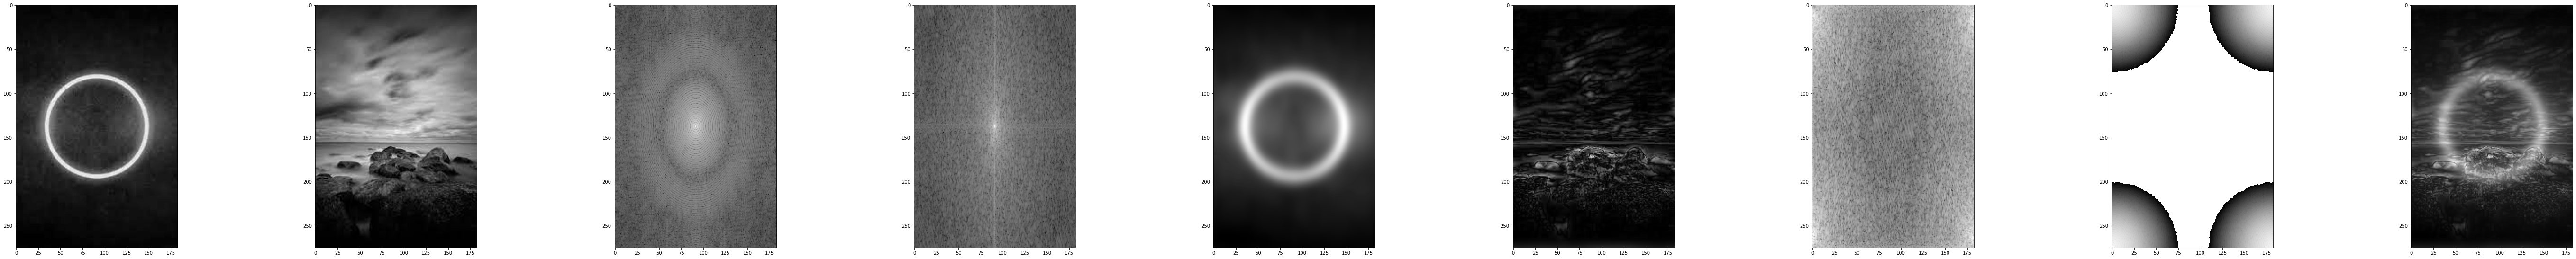

In [216]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/data/1.jpg', 0)
img1 =  cv2.imread('/content/data/2.jpg', 0)

def gaussian_2D_filter(shape,cutoff_frequency):
  M = shape[0]
  N = shape[1]
  H = np.zeros((M, N, 2), np.float32)
  D0 = cutoff_frequency
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = np.exp(-D**2/(2*D0*D0))
  return H


# YOUR CODE HERE: TUNE cutoff_frequency
cutoff_frequency = 7
x = np.shape(img)



"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""
filter = gaussian_2D_filter(x, cutoff_frequency)

"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
fshift = dft_shift * filter
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
HPC = 1-filter
dft1 = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
fshift1 = dft_shift1 * HPC
f_ishift1 = np.fft.ifftshift(fshift1)

img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:, :, 0], img_back1[:, :, 1])

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid = img_back+img_back1


"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))
f_septrum1 = 20 * np.log(cv2.magnitude(f_ishift1[:, :, 0], f_ishift1[:, :, 1]))

"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""

# YOUR CODE HERE.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
f_septrum = 20 * np.log(cv2.magnitude(f_ishift[:, :, 0], f_ishift[:, :, 1]))

"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
plots = [img,img1,magnitude_spectrum,magnitude_spectrum1,img_back,img_back1,f_septrum1,f_septrum,hybrid]
print(np.shape(hybrid))
plt.figure(figsize=(100,100))
for i in range(9):
    plt.subplot(9,9,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(plots[i],cmap = "gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log


(275, 183)


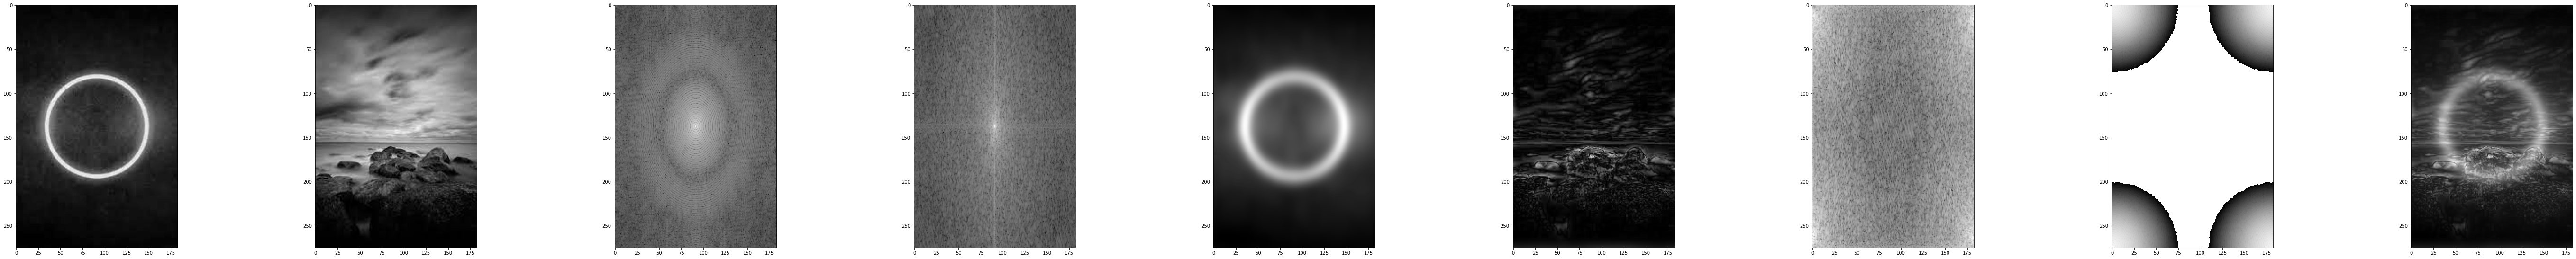

In [217]:
# Import necessary packages here
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/data/1.jpg', 0)
img1 =  cv2.imread('/content/data/2.jpg', 0)

def gaussian_2D_filter(shape,cutoff_frequency):
  M = shape[0]
  N = shape[1]
  H = np.zeros((M, N, 2), np.float32)
  D0 = cutoff_frequency
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = np.exp(-D**2/(2*D0*D0))
  return H


# YOUR CODE HERE: TUNE cutoff_frequency
cutoff_frequency = 7
x = np.shape(img)


"""cutoff_frequency is the standard deviation, in pixels, of the 
Gaussian blur that will remove the high frequencies from one image (image_1) and 
remove the low frequencies from another image (image_2) (to do so, subtract a blurred
version from the original version). You will want to tune this for every image pair to get the best results."""
filter = gaussian_2D_filter(x, cutoff_frequency)

"""Use imgfilter() to create 'low_frequencies' and 'high_frequencies' and then combine them to create 'hybrid_image'.
Remove the high frequencies from image_1 by blurring it. The amount of blur that works best will vary with different image pairs."""

# YOUR CODE HERE.
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
fshift = dft_shift * filter
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

"""Remove the low frequencies from image_2. The easiest way to do this is to
subtract a blurred version of image_2 from the original version of image_2.
This will give you an image centered at zero with negative values."""

# YOUR CODE HERE
HPC = 1-filter
dft1 = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
fshift1 = dft_shift1 * HPC
f_ishift1 = np.fft.ifftshift(fshift1)

img_back1 = cv2.idft(f_ishift1)
img_back1 = cv2.magnitude(img_back1[:, :, 0], img_back1[:, :, 1])

"""Combine the high frequencies and low frequencies to obtain hybrid_image."""
# YOUR CODE HERE
hybrid = img_back+img_back1


"""Firstly, visualize low_frequencies, high_frequencies, and the hybrid image."""
# YOUR CODE HERE.
magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))
f_septrum1 = 20 * np.log(cv2.magnitude(f_ishift1[:, :, 0], f_ishift1[:, :, 1]))

"""Secondly, also visualize log magnitude of Fourier Transform of the above.
HINT: You may use np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))) to achieve it."""

# YOUR CODE HERE.
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
f_septrum = 20 * np.log(cv2.magnitude(f_ishift[:, :, 0], f_ishift[:, :, 1]))

"""Thirdly, visualize hybrid_image_scale using helper function vis_hybrid_image.
Lastly, save all your outputs."""
# YOUR CODE HERE.
plots = [img,img1,magnitude_spectrum,magnitude_spectrum1,img_back,img_back1,f_septrum1,f_septrum,hybrid]
print(np.shape(hybrid))
plt.figure(figsize=(100,100))
for i in range(9):
    plt.subplot(9,9,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(plots[i],cmap = "gray")

## **Write-up**


1.   Provide the original and filtered images.
2.   Provide the the hybrid image and hybrid_image_scale using given helper function *vis_hybrid_image*.
3.   Log magnitude of the Fourier transform of the two original images, the filtered images, and the hybrid image.
4.   Briefly explain how this works, using your favorite results as illustrations

**Include your write-up here**

A-1,3) ALL The images are shown above as subplots below the code

A-4) The way this process works is that you remove the low frequency from one image and we remove the high frequency from another image and combine them. Because of this the edges of one image will be over the other blured image creating this hybrid effect.

My Fav one was of dog and a cat as it created a weird animal when we make a hybrid image from both of them.



# Part B: Pyramid Image (25 Points)

## Overview
Choose an image that has interesting variety of textures (from Flickr or your own images). The images should be atleast 640X480 pixels and converted to grayscale. Write code for a Gaussian and Laplacian pyramid of level N (use for loops). In each level, the resolution should be reduced by a factor of 2. Show the pyramids for your chosen image in your write-up. Here is an [example](https://drive.google.com/uc?id=17Y287EA-GJ2z0wtm_M7StIWsXyFeHvrz).

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [218]:
# Download Data -- run this cell only one time per runtime
!gdown 1KTDxPAkQam29YKtoX5dKPnLKpUOWCanCy
y
!unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1KTDxPAkQam29YKtoX5dKPnLKpUOWCanCy 

Archive:  /content/hybrid_pyramid_input.zip
replace /content/data/Afghan_girl_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/Afghan_girl_before.jpg  
replace /content/data/motorcycle.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/motorcycle.bmp  
replace /content/data/cat.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/cat.bmp   
replace /content/data/makeup_before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/makeup_before.jpg  
replace /content/data/fish.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/fish.bmp  
replace /content/data/bicycle.bmp? [

## Code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

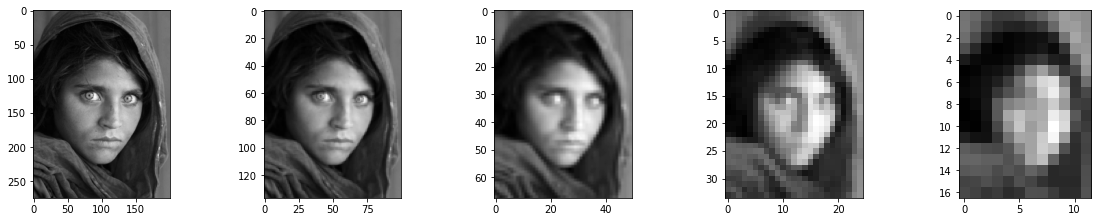

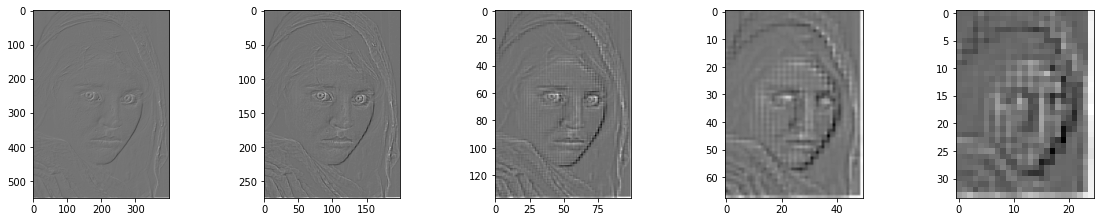

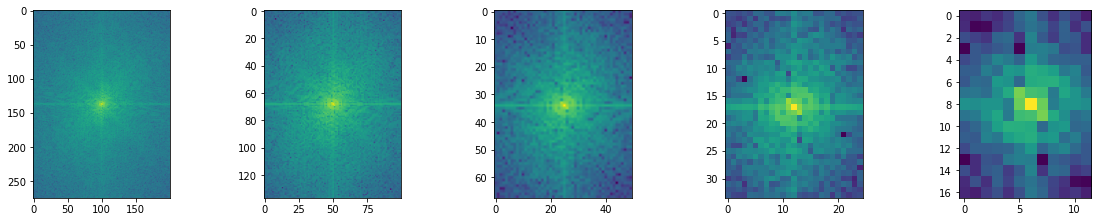

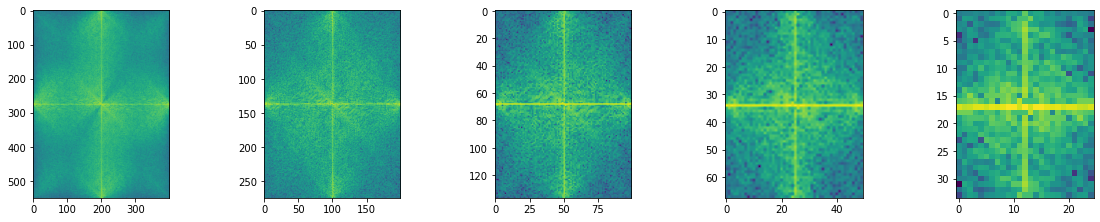

In [219]:
""" 
Steps:
1. Load an image im.
2. Call function pyramidsGL with image and num_levels = 5
3. Call function displayPyramids with G, L
4. Call function reconstructLaplacianPyramid with the generated L
5. Compute reconstruction error with L2 norm and print the error value.
"""
# Loading the libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Defining the variables
G = []
US = []
L = []
GM = []
LM = []
RSA = []

# Calling the images
img = cv2.imread('/content/data/Afghan_girl_before.jpg', 0)
img_copy = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
img1 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)


# Obtain the size of the original image
for i in range(1,6):
  [m, n] = img1.shape
# Downsampling by the factor of 2
  f = 2

  img2 = np.zeros((m//f, n//f), dtype=np.int)

  for i in range(0, m, f):
    for j in range(0, n, f):
      try:

        img2[i//f][j//f] = img1[i][j]
      except IndexError:
        pass

# Upsampling by the factor of 2
  img3 = np.zeros((m, n), dtype=np.int)

  for i in range(0, m-1, f):
      for j in range(0, n-1, f):
          img3[i, j] = img2[i//f][j//f]

  for i in range(1, m-(f-1), f):
      for j in range(0, n-(f-1)):
          img3[i:i+(f-1), j] = img3[i-1, j]
  
  for i in range(0, m-1):
      for j in range(1, n-1, f):
          img3[i, j:j+(f-1)] = img3[i, j-1]

# Storing the Upsampled and Gaussian images in the array
  G.append(img2)
  US.append(img3)
  img2 = cv2.blur(img2,(3,3))

  img1 = img2

# Creating the Laplacian prymid
L1 = img_copy - US[0]
L2 = G[0] - US[1]
L3 = G[1] - US[2]
L4 = G[2] - US[3]
L5 = G[3] - US[4]
L = [L1,L2,L3,L4,L5]


# Displaying the result
for i in range(5):
  dft = cv2.dft(np.float32(G[i]), flags=cv2.DFT_COMPLEX_OUTPUT)

  dft_shift = np.fft.fftshift(dft)
  
  magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

  GM.append(magnitude_spectrum)



for i in range(5):
  dft1 = cv2.dft(np.float32(L[i]), flags=cv2.DFT_COMPLEX_OUTPUT)

  dft_shift1 = np.fft.fftshift(dft1)
  
  magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))

  LM.append(magnitude_spectrum1)


plt.figure(figsize=(20,20))
for i in range(5):
      plt.subplot(5,5,i+1)   
      plt.imshow(G[i],cmap = "gray")

plt.figure(figsize=(20,20))
for i in range(5):
      plt.subplot(5,5,i+1)   
      plt.imshow(L[i],cmap = "gray")

plt.figure(figsize=(20,20))
for i in range(5):
      plt.subplot(5,5,i+1)   
      plt.imshow(GM[i])

plt.figure(figsize=(20,20))
for i in range(5):
      plt.subplot(5,5,i+1)   
      plt.imshow(LM[i])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


40.378122727272725


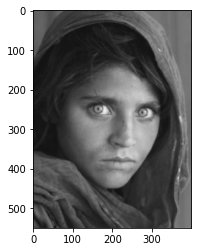

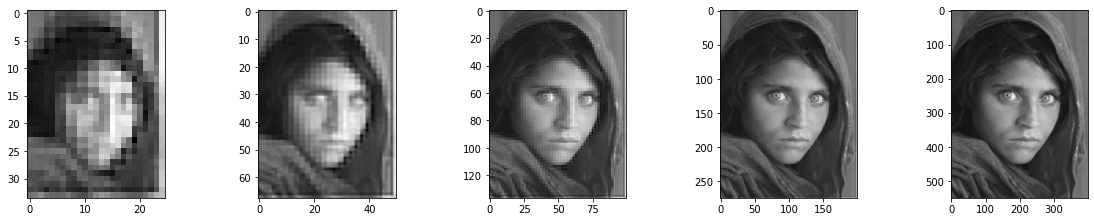

In [220]:
# Function to calculate mean square error
def mse(imageA, imageB):

	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	return err

# Restoration of the i =mage from the laplacian Prymid
US[0] = cv2.blur(US[0],(3,3))
res = US[0]+L[0]
plt.imshow(res , cmap = "gray")

j = [4,3,2,1,0]

for h in j:
  (m,n) = np.shape(L[h])
  RS = np.zeros((m, n), dtype=np.int)

  for a in range(0, m-1, f):
      for b in range(0, n-1, f):
          RS[a,b] = G[(h)][a//f][b//f]
  

  
  for i in range(1, m-(f-1), f):
      for j in range(0, n-(f-1)):
          RS[i:i+(f-1), j] = RS[i-1, j]

  for i in range(0, m-1):
      for j in range(1, n-1, f):
          RS[i, j:j+(f-1)] = RS[i, j-1]

  RS = cv2.blur(RS,(3,3))
  RS = RS + L[h]
  RSA.append(RS)


plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,5,i+1)    
    plt.imshow(RSA[i],cmap = "gray")





x = mse(img_copy,RSA[4])
print(x)

## **Write-up**

1. (10 Points) Display a Gaussian and Laplacian pyramid of level 5 (using your code). It should be formatted similar to [this](https://drive.google.com/file/d/1mAommQeJsp7WS8QCrZRcr8cQiltPPOh2/view?usp=sharing) figure.

2. (10 Points) Display the FFT amplitudes of your Gaussian/Laplacian pyramids Appropriate display ranges (from 0 to 1) should be chosen so that the changes in frequency in different levels of the pyramid are clearly visible. Explain  what the Laplacian and Gaussian pyramids are doing in terms of frequency. [This](https://drive.google.com/file/d/1BqTPKq6Mqqxl5jNNPkvx4JOA5MRgVq08/view?usp=sharing) looks like the expected output.

3. (5 Points) Image Reconstruction


**Include your write-up here**
A 2) In Gaussian prymid the images are getting subsampled and getting blured, While in the laplacian prymid we are getting the edge information the images.
The images are listed below the code

# Part C: Edge detection (25 points)

## Overview
The main steps of edge detection are: (1) assign a score to each pixel; (2) find local maxima along the direction perpendicular to the edge. Sometimes a third step is performed where local evidence is propagated so that long contours are more confident or strong edges boost the confidence of nearby weak edges. Optionally, a thresholding step can then convert from soft boundaries to hard binary boundaries. Here are sample outputs.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1orUji5-1CzjWmHk0g5y5kOVFhshNfhN8" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1npyMjhlRAeP1GaukV38SOlCe-O0whX37" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>
<table><tr>
<td> <img src="https://drive.google.com/uc?id=1TX54zNTG6q5ajitwV024FS-nOJiVP2VN" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1dPPSFDmakh8DQwlpTYmNXJPNHapdZF8S" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

**Hint:** Reading these papers will help understanding and may help with the programming assignment.

[The design and use of steerable filters](http://people.csail.mit.edu/billf/papers/steerpaper91FreemanAdelson.pdf)

[Berkeley Pb Detector](https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/papers/mfm-pami-boundary.pdf)

[Multi-scale edge detection](https://home.ttic.edu/~xren/publication/xren_eccv08_multipb.pdf)

## Data
We have provided 50 test images and the codes associated to download the unzip the data. Your job is to build a simple gradient-based edge detector and to extend it using multiple oriented filters.

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [ ]:
# Download Data -- run this cell only one time per runtime
!gdown 1zgblBWTQ847yZKnRmM1QrRiEWu1WvEo7
!unzip "/content/edge_detection_inputs.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1zgblBWTQ847yZKnRmM1QrRiEWu1WvEo7
To: /content/edge_detection_inputs.zip
100% 3.82M/3.82M [00:00<00:00, 126MB/s]
Archive:  /content/edge_detection_inputs.zip
   creating: /content/edge_detection_inputs/
  inflating: /content/edge_detection_inputs/65033.jpg  
  inflating: /content/edge_detection_inputs/21077.jpg  
  inflating: /content/edge_detection_inputs/41033.jpg  
  inflating: /content/edge_detection_inputs/12084.jpg  
  inflating: /content/edge_detection_inputs/108082.jpg  
  inflating: /content/edge_detection_inputs/38082.jpg  
  inflating: /content/edge_detection_inputs/45096.jpg  
  inflating: /content/edge_detection_inputs/42049.jpg  
  inflating: /content/edge_detection_inputs/89072.jpg  
  inflating: /content/edge_detection_inputs/69020.jpg  
  inflating: /content/edge_detection_inputs/103070.jpg  
  inflating: /content/edge_detection_inputs/38092.jpg  
  inflating: /content/edge_detection_inputs/85048.jpg  
  inflating: /c

In [221]:
# Import necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow ## Use this to show image in colab

img_path = "/content/edge_detection_inputs/????.jpg" ## add the path here
img = cv2.imread(img_path)

## Subpart 1: Simple edge detection (8 points)
Build a simple gradient-based edge detector that includes the following functions
```
def gradientMagnitude(im, signma)
```
This function should take an RGB image as input, smooth the image with Gaussian std=sigma, compute the x and y gradient values of the smoothed image, and output image maps of the gradient magnitude and orientation at each pixel. You can compute the gradient magnitude of an RGB image by taking the L2-norm of the R, G, and B gradients. The orientation can be computed from the channel corresponding to the largest gradient magnitude. The overall gradient magnitude is the L2-norm of the x and y gradients. mag and theta should be the same size as im.

```
def edgeGradient(im):
```
This function should use gradientMagnitude to compute a soft boundary map and then perform non-maxima suppression. For this assignment, it is acceptable to perform non-maxima suppression by retaining only the magnitudes along the binary edges produce by the Canny edge detector: `cv2.Canny(im)`. 

If desired, the boundary scores can be rescaled, e.g., by raising to an exponent: `mag2 = mag.^0.7` , which is primarily useful for visualization. 


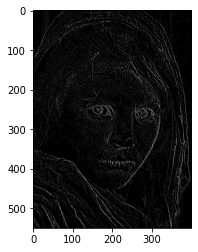

In [222]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
img = cv2.imread('/content/data/Afghan_girl_before.jpg')

def gradientMagnitude(img):
  '''
  im: input image
  sigma: standard deviation value to smooth the image

  outputs: gradient magnitude and gradient direction of the image
  '''
  ## YOUR CODE HERE

  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur function
  def gaussian_2D_filter(shape,sigma):
    M = shape[0]
    N = shape[1]
    H = np.zeros((M, N), np.float32)
    D0 = sigma
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))
    return H
  x = np.shape(img)
  sigma = 0.4
  filter = gaussian_2D_filter(x, sigma)
  
  img_blur = cv2.filter2D(img_gray, -1, filter, borderType=cv2.BORDER_CONSTANT) 

# Custom Gaussian Kernal
  gaussian_kernel = np.array([[1/16, 1/8, 1/16],  
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

# obtaing the derivative and dividing the kernal into 2 parts
  gaussian_derivative_x = gaussian_kernel*[1,0,-1]
  gaussian_derivative_y = np.flip(gaussian_derivative_x.T , axis = 0)

  img_y = cv2.filter2D(img_blur, -1, gaussian_derivative_y, borderType=cv2.BORDER_CONSTANT)
  img_x = cv2.filter2D(img_blur, -1, gaussian_derivative_x, borderType=cv2.BORDER_CONSTANT)

# Obtaining the magnitude

  gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
  gradient_magnitude *= 255.0 / gradient_magnitude.max()

# Obtaining the direction
  gradient_direction = np.arctan2(img_y, img_x)

  return  gradient_magnitude, gradient_direction

# A function for non Max supression
def edgeGradient(gradient_magnitude,gradient_direction):
  '''
  im: input image

  output: a soft boundary map of the image
  '''
  ## YOUR CODE HERE
  image_row, image_col = gradient_magnitude.shape

  output = np.zeros(gradient_magnitude.shape)

  PI = 180

  for row in range(1, image_row - 1):
      for col in range(1, image_col - 1):
          direction = gradient_direction[row, col]

          
          if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
              before_pixel = gradient_magnitude[row, col - 1]
              after_pixel = gradient_magnitude[row, col + 1]

          elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
              before_pixel = gradient_magnitude[row + 1, col - 1]
              after_pixel = gradient_magnitude[row - 1, col + 1]

          elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
              before_pixel = gradient_magnitude[row - 1, col]
              after_pixel = gradient_magnitude[row + 1, col]

          else:
              before_pixel = gradient_magnitude[row - 1, col - 1]
              after_pixel = gradient_magnitude[row + 1, col + 1]

          if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
              output[row, col] = gradient_magnitude[row, col]

  return output

x,y = gradientMagnitude(img)
output = edgeGradient(x,y)
plt.imshow(output,cmap = 'gray')

## Subpart 2: Improved Edge Detection (8 points)
Try to improve your results using a set of oriented filters, rather than the simple derivative of Gaussian approach above, including the following functions:
```
def orientedFilterMagnitude(im):
```
Computes the boundary magnitude and orientation using a set of oriented filters, such as elongated Gaussian derivative filters. Explain your choice of filters in the write-up. Use at least four orientations. One way to combine filter responses is to compute a boundary score for each filter (simply by filtering with it) and then use the max and argmax over filter responses to compute the magnitude and orientation for each pixel.
```
def edgeOrientedFilters(im):
```
Similar to Subpart 1, this should call orientedFilterMagnitude, perform the non-maxima suppression, and output the final soft edge map.

A Gaussian filter rotated by 45 degrees

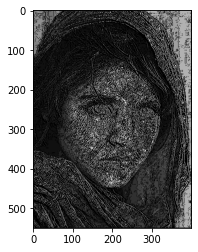

In [223]:
from numpy.ma.core import bitwise_and
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
img = cv2.imread('/content/data/Afghan_girl_before.jpg')

def gradientMagnitude(img,sigma):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  def gaussian_2D_filter(shape,cutoff_frequency):
    M = shape[0]
    N = shape[1]
    H = np.zeros((M, N), np.float32)
    D0 = cutoff_frequency
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))
    return H
  cutoff_frequency = sigma
  x = np.shape(img)
  filter = gaussian_2D_filter(x, cutoff_frequency)

  img_blur = cv2.filter2D(img_gray, -1, filter, borderType=cv2.BORDER_CONSTANT) 

  gaussian_kernel = np.array([[1/16, 1/8, 1/16],  
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

  gaussian_derivative_x = gaussian_kernel*[1,0,-1]
  gaussian_derivative_y = np.flip(gaussian_derivative_x.T , axis = 0)

# Rotating the gaussian filter by 45 
  theta = np.radians(45)

  c,s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s,1), (s, c,1),(1,1,1)))

  gaussian_derivative_y = R*gaussian_derivative_y
  gaussian_derivative_y = R*gaussian_derivative_y

  img_y = cv2.filter2D(img_blur, -1, gaussian_derivative_y, borderType=cv2.BORDER_CONSTANT)
  img_x = cv2.filter2D(img_blur, -1, gaussian_derivative_x, borderType=cv2.BORDER_CONSTANT)


  gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
  gradient_magnitude *= 255.0 / gradient_magnitude.max()


  gradient_direction = np.arctan2(img_y, img_x)

  return  gradient_magnitude, gradient_direction

def edgeOrientedFilters(gradient_magnitude,gradient_direction):
  '''
  im: input image

  output: a soft boundary map of the image
  '''
  ## YOUR CODE HERE
  image_row, image_col = gradient_magnitude.shape

  output = np.zeros(gradient_magnitude.shape)

  PI = 180

  for row in range(1, image_row - 1):
      for col in range(1, image_col - 1):
          direction = gradient_direction[row, col]

        
          if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
              before_pixel = gradient_magnitude[row, col - 1]
              after_pixel = gradient_magnitude[row, col + 1]

          elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
              before_pixel = gradient_magnitude[row + 1, col - 1]
              after_pixel = gradient_magnitude[row - 1, col + 1]

          elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
              before_pixel = gradient_magnitude[row - 1, col]
              after_pixel = gradient_magnitude[row + 1, col]

          else:
              before_pixel = gradient_magnitude[row - 1, col - 1]
              after_pixel = gradient_magnitude[row + 1, col + 1]

          if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
              output[row, col] = gradient_magnitude[row, col]

  return output


x,y = gradientMagnitude(img,0.3)
output = edgeOrientedFilters(x,y)
plt.imshow(output,cmap = 'gray')


A Gaussian filter rotated by 90 degrees

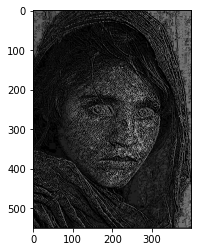

In [224]:
from numpy.ma.core import bitwise_and
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
img = cv2.imread('/content/data/Afghan_girl_before.jpg')

def gradientMagnitude(img,sigma):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  def gaussian_2D_filter(shape,cutoff_frequency):
    M = shape[0]
    N = shape[1]
    H = np.zeros((M, N), np.float32)
    D0 = cutoff_frequency
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))
    return H
  cutoff_frequency = sigma
  x = np.shape(img)
  filter = gaussian_2D_filter(x, cutoff_frequency)

  img_blur = cv2.filter2D(img_gray, -1, filter, borderType=cv2.BORDER_CONSTANT) 

  gaussian_kernel = np.array([[1/16, 1/8, 1/16],  
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

  gaussian_derivative_x = gaussian_kernel*[1,0,-1]
  gaussian_derivative_y = np.flip(gaussian_derivative_x.T , axis = 0)


# Rotating the gaussian filter by 90
  theta = np.radians(90)

  c,s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s,1), (s, c,1),(1,1,1)))

  gaussian_derivative_y = R*gaussian_derivative_y
  gaussian_derivative_y = R*gaussian_derivative_y

  img_y = cv2.filter2D(img_blur, -1, gaussian_derivative_y, borderType=cv2.BORDER_CONSTANT)
  img_x = cv2.filter2D(img_blur, -1, gaussian_derivative_x, borderType=cv2.BORDER_CONSTANT)


  gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
  gradient_magnitude *= 255.0 / gradient_magnitude.max()


  gradient_direction = np.arctan2(img_y, img_x)

  return  gradient_magnitude, gradient_direction

def edgeOrientedFilters(gradient_magnitude,gradient_direction):
  '''
  im: input image

  output: a soft boundary map of the image
  '''
  ## YOUR CODE HERE
  image_row, image_col = gradient_magnitude.shape

  output = np.zeros(gradient_magnitude.shape)

  PI = 180

  for row in range(1, image_row - 1):
      for col in range(1, image_col - 1):
          direction = gradient_direction[row, col]

          # (0 - PI/8 and 15PI/8 - 2PI)
          if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
              before_pixel = gradient_magnitude[row, col - 1]
              after_pixel = gradient_magnitude[row, col + 1]

          elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
              before_pixel = gradient_magnitude[row + 1, col - 1]
              after_pixel = gradient_magnitude[row - 1, col + 1]

          elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
              before_pixel = gradient_magnitude[row - 1, col]
              after_pixel = gradient_magnitude[row + 1, col]

          else:
              before_pixel = gradient_magnitude[row - 1, col - 1]
              after_pixel = gradient_magnitude[row + 1, col + 1]

          if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
              output[row, col] = gradient_magnitude[row, col]

  return output


x,y = gradientMagnitude(img,0.3)
output = edgeOrientedFilters(x,y)
plt.imshow(output,cmap = 'gray')


A Gaussian filter rotated by 135 

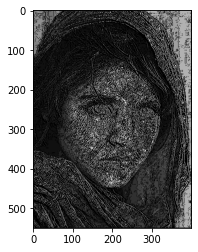

In [225]:
from numpy.ma.core import bitwise_and
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
img = cv2.imread('/content/data/Afghan_girl_before.jpg')

def gradientMagnitude(img,sigma):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  def gaussian_2D_filter(shape,cutoff_frequency):
    M = shape[0]
    N = shape[1]
    H = np.zeros((M, N), np.float32)
    D0 = cutoff_frequency
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = np.exp(-D**2/(2*D0*D0))
    return H
  cutoff_frequency = sigma
  x = np.shape(img)
  filter = gaussian_2D_filter(x, cutoff_frequency)

  img_blur = cv2.filter2D(img_gray, -1, filter, borderType=cv2.BORDER_CONSTANT) 

  gaussian_kernel = np.array([[1/16, 1/8, 1/16],  
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

  gaussian_derivative_x = gaussian_kernel*[1,0,-1]
  gaussian_derivative_y = np.flip(gaussian_derivative_x.T , axis = 0)


# Rotating the gaussian filter by 135
  theta = np.radians(135)

  c,s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s,1), (s, c,1),(1,1,1)))

  gaussian_derivative_y = R*gaussian_derivative_y
  gaussian_derivative_y = R*gaussian_derivative_y

  img_y = cv2.filter2D(img_blur, -1, gaussian_derivative_y, borderType=cv2.BORDER_CONSTANT)
  img_x = cv2.filter2D(img_blur, -1, gaussian_derivative_x, borderType=cv2.BORDER_CONSTANT)


  gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
  gradient_magnitude *= 255.0 / gradient_magnitude.max()


  gradient_direction = np.arctan2(img_y, img_x)

  return  gradient_magnitude, gradient_direction

def edgeOrientedFilters(gradient_magnitude,gradient_direction):
  '''
  im: input image

  output: a soft boundary map of the image
  '''
  ## YOUR CODE HERE
  image_row, image_col = gradient_magnitude.shape

  output = np.zeros(gradient_magnitude.shape)

  PI = 180

  for row in range(1, image_row - 1):
      for col in range(1, image_col - 1):
          direction = gradient_direction[row, col]

          # (0 - PI/8 and 15PI/8 - 2PI)
          if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
              before_pixel = gradient_magnitude[row, col - 1]
              after_pixel = gradient_magnitude[row, col + 1]

          elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
              before_pixel = gradient_magnitude[row + 1, col - 1]
              after_pixel = gradient_magnitude[row - 1, col + 1]

          elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
              before_pixel = gradient_magnitude[row - 1, col]
              after_pixel = gradient_magnitude[row + 1, col]

          else:
              before_pixel = gradient_magnitude[row - 1, col - 1]
              after_pixel = gradient_magnitude[row + 1, col + 1]

          if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
              output[row, col] = gradient_magnitude[row, col]

  return output


x,y = gradientMagnitude(img,0.3)
output = edgeOrientedFilters(x,y)
plt.imshow(output,cmap = 'gray')


## Write-up (9 points)

1.   **(2 points)** Description of any design choices and parameters
2.   **(1 points)** The bank of filters used for Subpart 2 ([plt.imshow with extent](https://stackoverflow.com/questions/13384653/imshow-extent-and-aspect/13390798#13390798) or [cv2.normalize to convert output into grayscale](https://stackoverflow.com/questions/39808545/implement-mat2gray-in-opencv-with-python) may help with visualization)
3.   **(5 points)** Qualitative results: choose five example images; show input images and outputs of each edge detector
4.   **(1 points)** Discuss the quality of your outputs and state one possible way for improvement. Improvements could provide, for example, a better boundary pixel score or a better suppression technique. Your idea could come from a paper you read, but cite any sources of ideas.



**Include your write-up here**
A1) For this question i rotated the gaussian filter my 90,45,135 to see the various effect on the edges the result i found is that edges apper more in the direction the roattion of the filter

A3) For this question i only took 1 images and apply the oriantation filters to see the different effects

A4) In my case the quality was worse when i took the orantation of the filter and the reason behind this is that i took the samll gaussian kernal.

# Part D: Template Matching (25 points) 

## Overview
The goal of this part is to build a template maching algorithm for where's waldo puzzle. 
The end product should be finding waldo in puzzle images. 


## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**


In [226]:
# Download Data -- run this cell only one time per runtime
!gdown 1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
!unzip "/content/Part4_data.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1_PHimFhPSajbTWzAL6-PwM803uzA7Ymb
To: /content/Part4_data.zip
100% 2.04M/2.04M [00:00<00:00, 174MB/s]
Archive:  /content/Part4_data.zip
replace /content/__MACOSX/._Part4_data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/._Part4_data  
replace /content/Part4_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Part4_data/.DS_Store  
replace /content/__MACOSX/Part4_data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/Part4_data/._.DS_Store  
replace /content/__MACOSX/Part4_data/._puzzle2? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/Part4_data/._puzzle2  
replace /content/__MACOSX/Part4_data/._puzzle1? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/Part4_data/._puzzle1  
replace /content/Part4_data/puzzle2/waldo.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Part4_data/puzzle2/wald

## Code

We provide the following functions for plotting your results 


In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(im,title,xticks=[],yticks= [],cv2 = True):
    """
    im :Image to plot
    title : Title of image 
    xticks : List of tick values. Defaults to nothing
    yticks :List of tick values. Defaults to nothing 
    cv2 :Is the image cv2 image? cv2 images are BGR instead of RGB. Default True
    """
    plt.figure()
    plt.imshow(im[:,:,::-1])
    plt.title(title)
    plt.xticks(xticks)
    plt.yticks(yticks)

It is always advised for you to visualize and get familar with waldo and puzzle image. 

Visualize both the waldo and puzzle images.

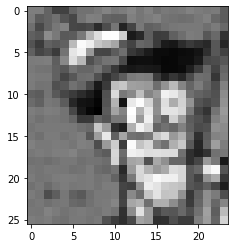

In [227]:
## YOUR CODE HERE
puzzle_1 = cv2.imread('/content/Part4_data/puzzle1/pic1.jpeg')
map = cv2.cvtColor(puzzle_1, cv2.COLOR_BGR2GRAY)
plt.imshow(puzzle_1,cmap = "gray")

waldo_1 = cv2.imread('/content/Part4_data/puzzle1/waldo.jpg')
waldo = cv2.cvtColor(waldo_1, cv2.COLOR_BGR2GRAY)
plt.imshow(waldo_1,cmap = "gray")

puzzle_2 = cv2.imread('/content/Part4_data/puzzle2/map.jpg')
puzzle_2 = cv2.cvtColor(puzzle_2, cv2.COLOR_BGR2GRAY)
plt.imshow(puzzle_2,cmap = "gray")

waldo_2 = cv2.imread('/content/Part4_data/puzzle2/waldo.png')
waldo_2 = cv2.cvtColor(waldo_2, cv2.COLOR_BGR2GRAY)
plt.imshow(waldo_2,cmap = "gray")


### Subpart 1: Template Matching with OpenCV
OpenCV provide Template Matching functions below link. 

https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

You can use this function for implementing simple where's waldo algorithm.

This part helps you to understand the concepts of Template Matching and OpenCV Library. This is just for reference.

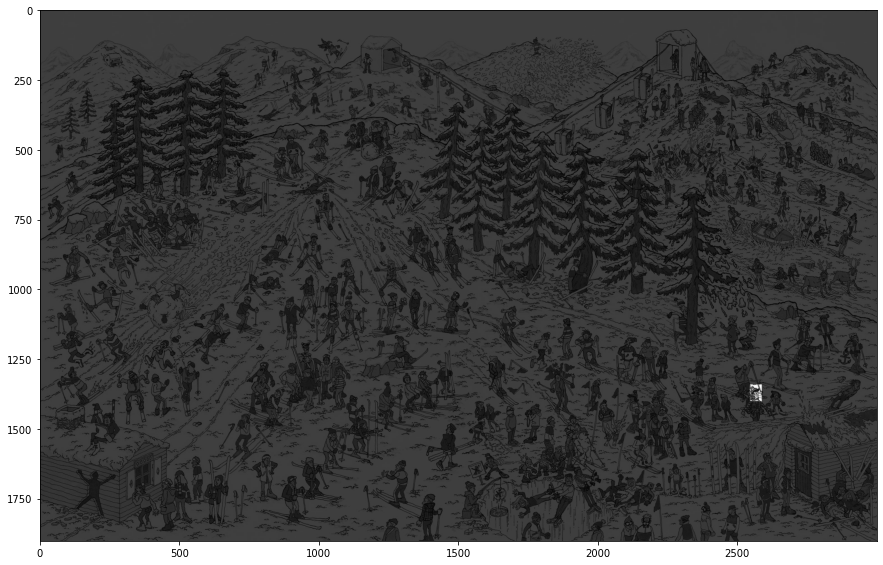

In [228]:
(waldoHeight, waldoWidth) = waldo.shape[:2]

result = cv2.matchTemplate(map, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

# grab the bounding box of waldo and extract him from the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = map[topLeft[1] : botRight[1], topLeft[0] : botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the map except for Waldo
mask = np.zeros(map.shape, dtype = "uint8")
map = cv2.addWeighted(map, 0.25, mask, 0.75, 0)

map[topLeft[1] : botRight[1], topLeft[0] : botRight[0]] = roi

# display the images
result_rgb = cv2.cvtColor(map, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (15, 15))
plt.imshow(result_rgb)

### Subpart 2: Template Matching from Scratch

Implement the Sum of Squared Distance (SSD) template matching algorithm from scratch (Don't use cv2.matchTemplate).

Then, show the results of where's waldo for two puzzle images.

Hints: You can borrow the codes from Part1 and Part2. Please read methods for matching with filters in Lecture Slide.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


1342 2537


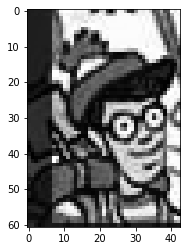

In [229]:
#Importing the library
import numpy as np

t = np.shape(waldo)
m = np.shape(map)

row =int(m[0]/t[0])

col = int(m[1]/t[1])


# SSD and sliding window Algo
u = 0
v = 0
values = []
for i in range(row):
  for j in range(col):
    s=0
    for m in range (t[0]):
      for n in range(t[1]):
        
         s = s +(pow(waldo[m][n] - map[m+u][n+v],2))

    values.append(s)


            
    if v == 0:
            v = (v+1)*t[1]
    elif v != 0:
          v = v+t[1]
    
                    
  if u == 0:
        u = (u+1)*t[0]
  elif u != 0:
      u = u+t[0]
  v = 0       

# Getting the templete location 
values = np.array(values)
values = values.reshape(row, col)

# Finding the lowest difference in the image
x,y = np.unravel_index(np.argmin(values),values.shape)

# Obtaining the pixel location
x = x*t[0]
y = y*t[1]
print(x,y)  # Pixel start value

roi = map[x:x+t[0],y:y+t[1]] # Cropping the region of intrest
plt.imshow(roi, cmap = 'gray') # Displaying the result
